# Homework 4

## Question 1

### 1. A naive analysis

We import the data stored in the csv file and we perform a first naive analysis.

We are interested in the *re78* value and how it differs between people who have followed the training program (*treat=1*) and those who did not (*treat=0*).

The first idea is to split the data according to the value of *treat* using the **groupby** method, and use **describe** to print the basic stats about *re78* for each group.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
db = pd.read_csv('lalonde.csv')


db.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [5]:
db.groupby(['treat'])['re78'].describe()

treat       
0      count      429.000000
       mean      6984.169742
       std       7294.161791
       min          0.000000
       25%        220.181300
       50%       4975.505000
       75%      11688.820000
       max      25564.670000
1      count      185.000000
       mean      6349.143530
       std       7867.402218
       min          0.000000
       25%        485.229800
       50%       4232.309000
       75%       9642.999000
       max      60307.930000
Name: re78, dtype: float64

We observe that participating in the program does not seem to improve your income, as the *mean* income is greater among people who did not follow the program.

However the *1st quartile (25%)* is higher among people who followed the program, meaning that there are fewer people with very low salaries.

Moreover, the *max* and *standard deviation* are higher, which means that there are few people who followed the program and earned a lot more than people not following the program, as shown in the following graph:

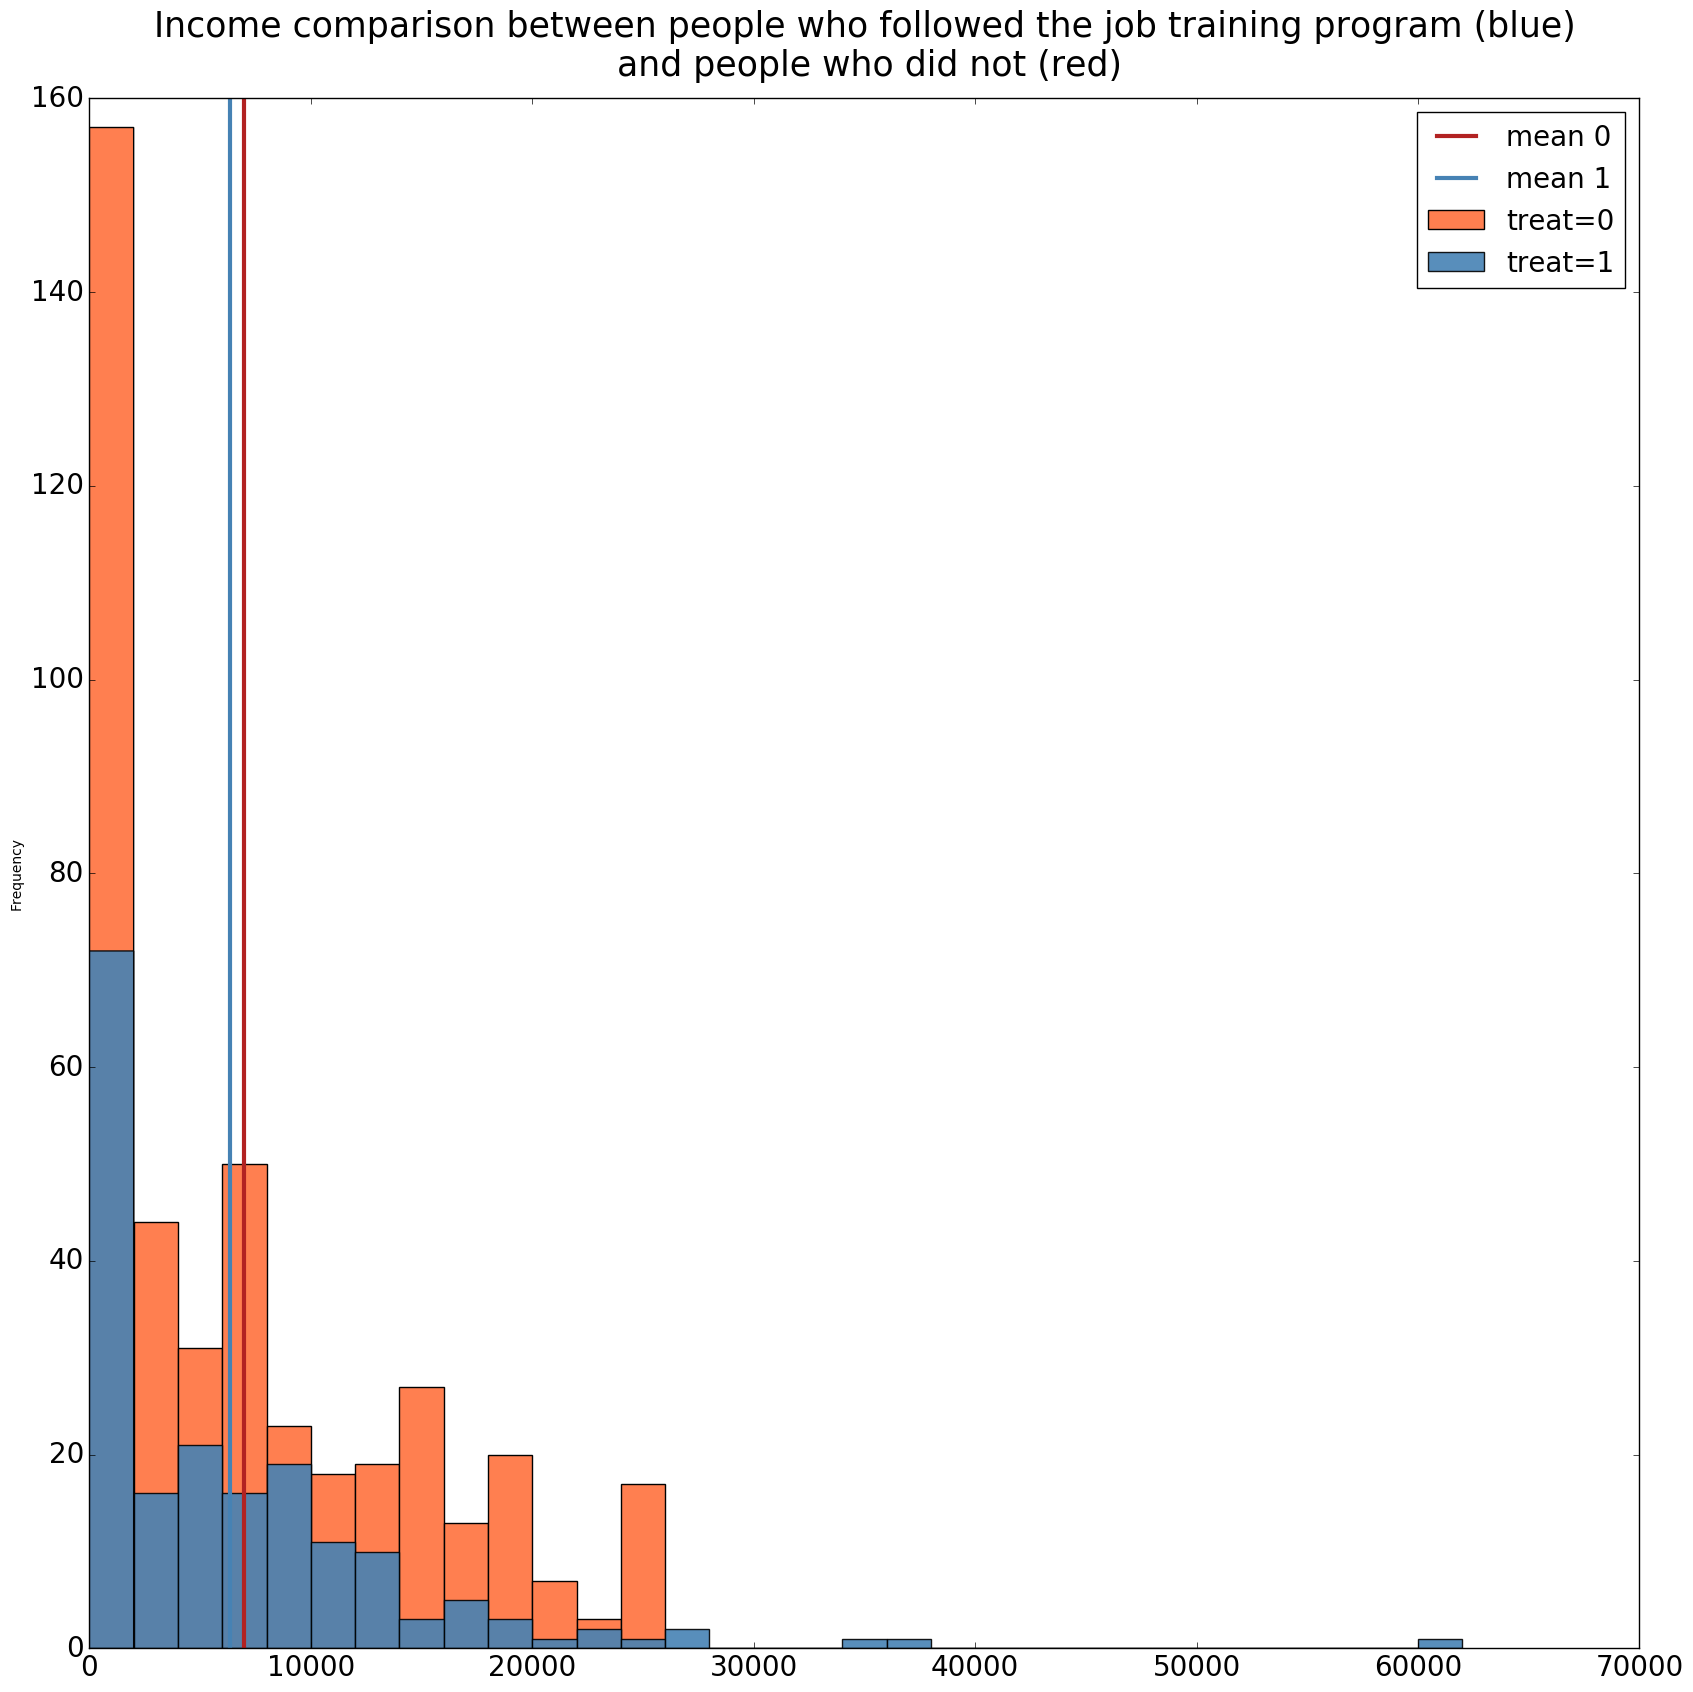

In [78]:
# Regularized bin size according to the values obtained with describe
bins_ = pd.Series([2000*i for i in range(32)])

# Large figure
fig = plt.figure(figsize=(20,20))

# Bin plots: note that they are NOT stacked
ax0 = db[db['treat']==0]['re78'].plot.hist(bins=bins_, color='coral', alpha=1, label='treat=0')
ax1 = db[db['treat']==1]['re78'].plot.hist(bins=bins_, color='steelblue', alpha=0.9,  label='treat=1')

# Add the means of each group
plt.axvline(db[db['treat']==0]['re78'].mean(),color='firebrick',lw=3,label ='mean 0')
plt.axvline(db[db['treat']==1]['re78'].mean(),color='steelblue',lw=3,label ='mean 1')

# Adapt the legend/axis/title size
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=20)
plt.title('Income comparison between people who followed the job training program (blue)\n and people who did not (red)',fontsize=25,y=1.01)

plt.show()

A naive researcher might conclude that, depite a few particular cases of great success, the program is **not efficient** to train people.

### 2. A closer look at the data

## Question 2

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

#DON'T DO IT TO OFTEN, IT TAKES SEVERAL MINUTES !
newsgroups_train = fetch_20newsgroups(data_home='.',subset='train',download_if_missing=True)

In [6]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [7]:
newsgroups_train['filenames']

array(['.\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       '.\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       '.\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       ...,
       '.\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695',
       '.\\20news_home\\20news-bydate-train\\comp.graphics\\38319',
       '.\\20news_home\\20news-bydate-train\\rec.motorcycles\\104440'],
      dtype='<U64')

In [8]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']